In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("mushroom_cleaned.csv")

In [5]:
df.head() #0 - Edible, 1 - Non Edible

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [7]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [8]:
df.shape

(54035, 9)

## Correlation Matrix to check dependent columns
##### if heatmap has more than 0.85 (std threshold) then those two columns are highly correlated and provides no additional info to the model, so drop one of them.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

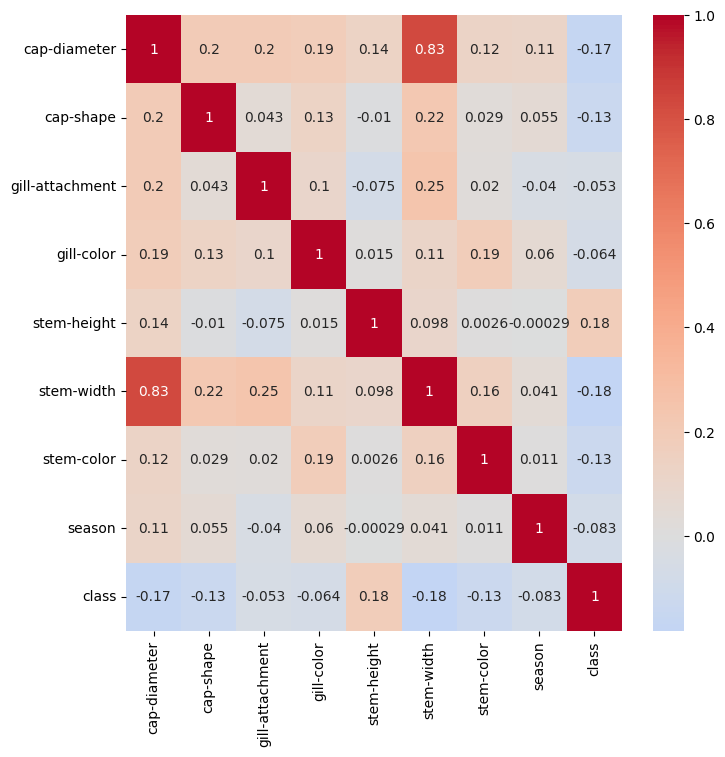

In [10]:
plt.figure(figsize = (8,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, center = 0, cmap = "coolwarm")

In [11]:
corr_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
X = df.drop(columns = "class")
y = df["class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
model = LogisticRegression(max_iter = 1000)

In [16]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
model.score(X_train, y_train)

0.6357916165448321

In [18]:
y_predict = model.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_predict)

0.6304247247154622

## Z Normalization 
##### Makes the datapoint's mean and SD equal to 0 and 1 resp. Applied on X_train and X_test as these are the only to be scaled, we dont want our dependent values to be normalized (LOGIC)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [24]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7
0,-0.928679,0.926556,-0.510369,1.145229,0.816458,-0.719048,-0.435291,-0.029585
1,-0.596212,0.926556,-0.959317,-1.981924,-0.076710,-0.713935,-2.275859,-0.029585
2,1.531575,-0.922535,-0.959317,0.832514,3.513007,1.180341,0.791755,-0.029585
3,-0.305304,0.464283,-0.510369,1.145229,-1.031054,-0.411005,-2.275859,-0.209212
4,-0.380109,0.926556,-0.959317,1.145229,-1.130244,-0.529876,-0.435291,-0.209212


In [25]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7
0,0.379023,-0.922535,1.734373,1.145229,-0.530721,-0.044164,0.791755,-0.029585
1,-0.690411,-0.460262,0.387528,-1.669208,1.929860,-1.341526,-1.969097,-3.034586
2,0.262660,0.926556,-0.959317,-0.731063,-0.653072,0.092602,0.791755,-0.029585
3,0.423352,0.926556,1.734373,0.832514,-0.878114,0.837786,0.791755,-0.029585
4,-0.626689,-0.460262,0.387528,-1.669208,1.929860,-1.341526,-1.969097,-3.034586


In [26]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [27]:
model.score(X_train_scaled, y_train)

0.6356990839270843

In [28]:
y_predict = model.predict(X_test_scaled)

In [29]:
metrics.accuracy_score(y_predict, y_test)

0.6303321920977144

## Calculating Z Score

###### Z normalization and Z score are basically the same thing as they both have the same formula : Z = (X-mu)/sd. Z normalization is used in ML preprocessing and ensures that every feature has mean = 0 and SD = 1. Z score is used for statistical analysis to compute z score, is direclty appiled to entire dataset, generally used to find outliers (Threshold: abs(Z score) > 3 is an outlier)

In [30]:
from scipy import stats
import numpy as np

In [31]:
zscores = stats.zscore(df)
zscores

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.236139,-0.925864,-0.063737,0.834467,4.682845,0.631570,0.791508,2.788402,0.906031
1,2.483444,-0.925864,-0.063737,0.834467,4.682845,0.646914,0.791508,2.788402,0.906031
2,2.233361,-0.925864,-0.063737,0.834467,4.383334,0.658423,0.791508,2.788402,0.906031
3,1.927704,0.925572,-0.063737,0.834467,4.652283,0.658423,0.791508,2.788402,0.906031
4,2.049966,0.925572,-0.063737,0.834467,4.536146,0.527996,0.791508,-0.029348,0.906031
...,...,...,...,...,...,...,...,...,...
54030,-1.373393,0.462713,0.384935,-1.665349,0.197600,-0.616434,1.098064,-0.029348,0.906031
54031,-1.348385,-0.925864,0.384935,-1.665349,0.656036,-0.717450,1.098064,-0.029348,0.906031
54032,-1.348385,0.462713,0.384935,-1.665349,0.240388,-0.597253,1.098064,-0.208490,0.906031
54033,-1.356721,-0.925864,0.384935,-1.665349,0.423762,-0.716172,1.098064,-0.208490,0.906031


In [32]:
outliers = (abs(zscores) > 3).any(axis = "columns")
outliers.value_counts()

False    50397
True      3638
Name: count, dtype: int64

In [33]:
index = zscores[outliers].index
index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       53672, 53673, 53674, 53675, 53676, 53677, 53678, 53679, 53680, 53681],
      dtype='int64', length=3638)

In [34]:
df = df.drop(index = index)

In [35]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
11,642,6,2,10,0.286062,1311,11,0.943195,1
12,814,4,2,10,1.189292,1681,11,0.943195,1
13,550,4,2,10,0.548675,1220,11,0.888450,1
14,606,6,2,10,0.254230,1239,11,0.943195,1
15,721,6,2,10,0.950553,1445,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [36]:
df = df.reset_index()

In [37]:
df = df.drop(columns = "index")
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,642,6,2,10,0.286062,1311,11,0.943195,1
1,814,4,2,10,1.189292,1681,11,0.943195,1
2,550,4,2,10,0.548675,1220,11,0.888450,1
3,606,6,2,10,0.254230,1239,11,0.943195,1
4,721,6,2,10,0.950553,1445,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
50392,73,5,3,2,0.887740,569,12,0.943195,1
50393,82,2,3,2,1.186164,490,12,0.943195,1
50394,82,5,3,2,0.915593,584,12,0.888450,1
50395,79,2,3,2,1.034963,491,12,0.888450,1


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(columns = "class")
y = df[["class"]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

model = LogisticRegression()

In [43]:
y_train.head()

,class
14645,0
43502,0
32068,1
6857,1
9314,1


In [44]:
y_train1 = y_train.values.ravel()

In [45]:
y_train1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [46]:
model = LogisticRegression(max_iter = 1000)

In [47]:
model.fit(X_train, y_train1)

LogisticRegression(max_iter=1000)

In [48]:
model.score(X_train, y_train)

0.6470967581913337

##### Logistic regression is a simple, interpretable, and efficient model that works well when the data is linearly separable.
##### It becomes less effective as the dataset becomes more non-linear, complex, or high-dimensional.
##### If your accuracy is stuck at 65%, the dataset might require a model with non-linear decision boundaries or more advanced learning capabilities.